In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
health = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\EDA_Patricia_Diez\EDA_Entrega\src\data\health_cleaned.csv")
health.head(2)

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Has_condition
0,32,Non-Binary,Hr,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Yes
1,40,Female,Data Scientist,It,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Yes


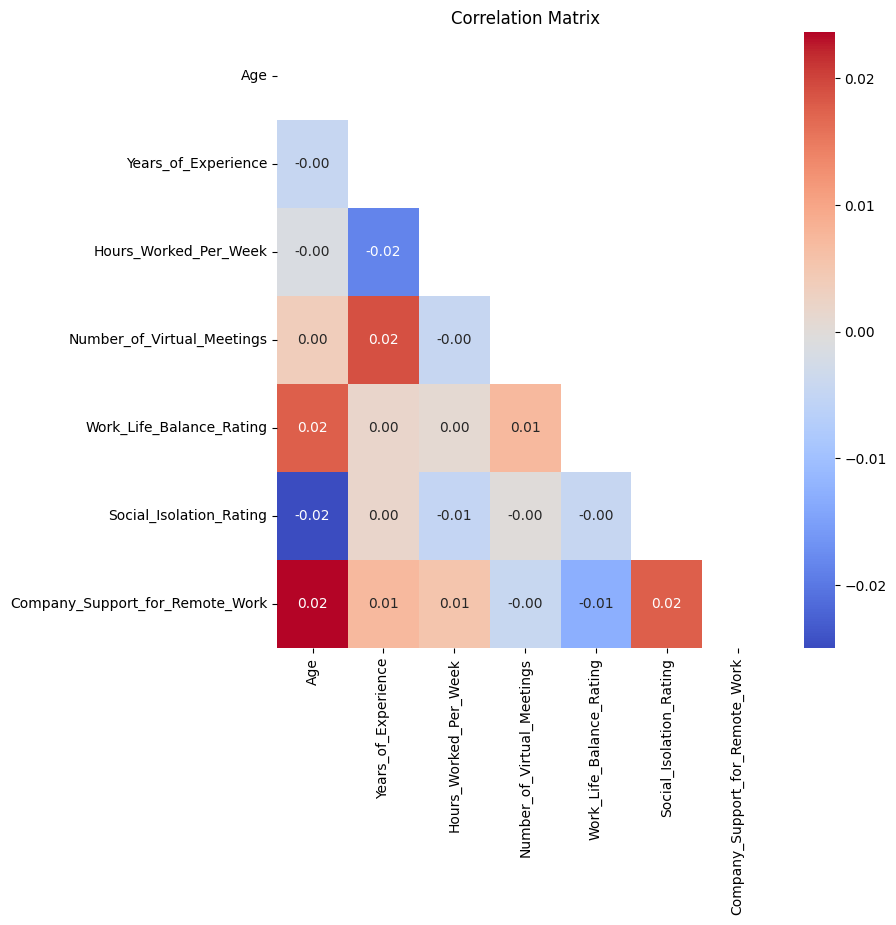

In [4]:
plt.figure(figsize=(8, 8))
numeric_df = health.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()

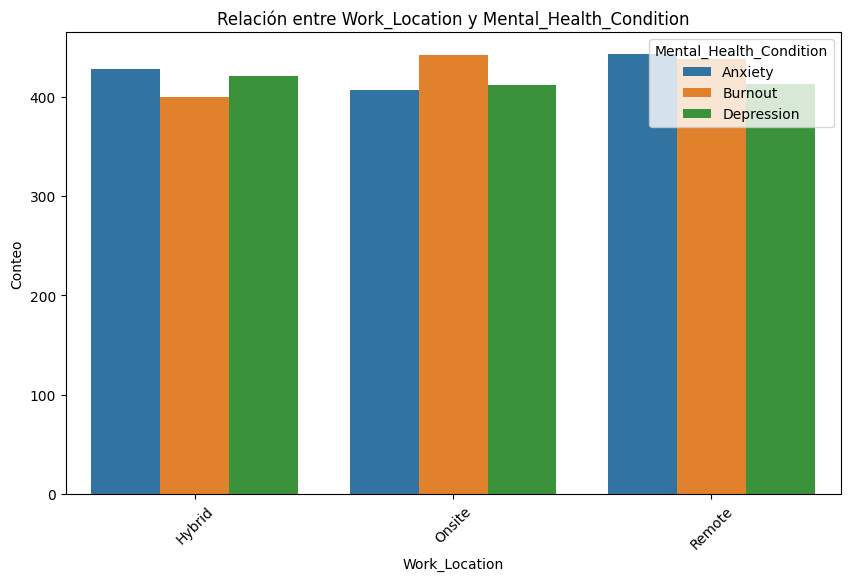

In [5]:
from bootcampviztools import * 

plot_categorical_relationship_fin(health, "Work_Location", "Mental_Health_Condition")

#INTERESANTE!!!

#Tanto en onsite como en remote hay más Burnout(sobre todo en onsite), pero en cambio la ansiedad cambia el orden(remote,hybrid, onsite)
# y luego la depresion (hybrido, onsite y remote)

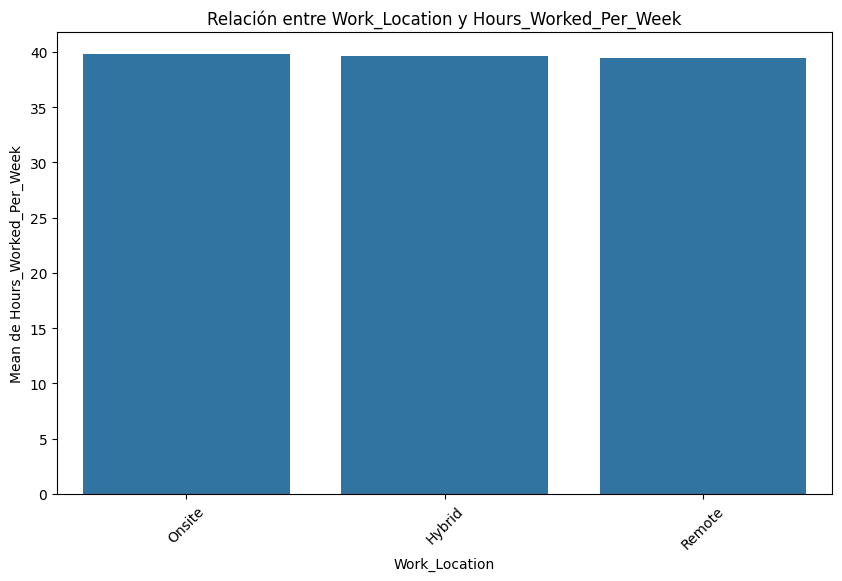

In [6]:
plot_categorical_numerical_relationship(health, "Work_Location", "Hours_Worked_Per_Week")

#trabajan horas parecidas 

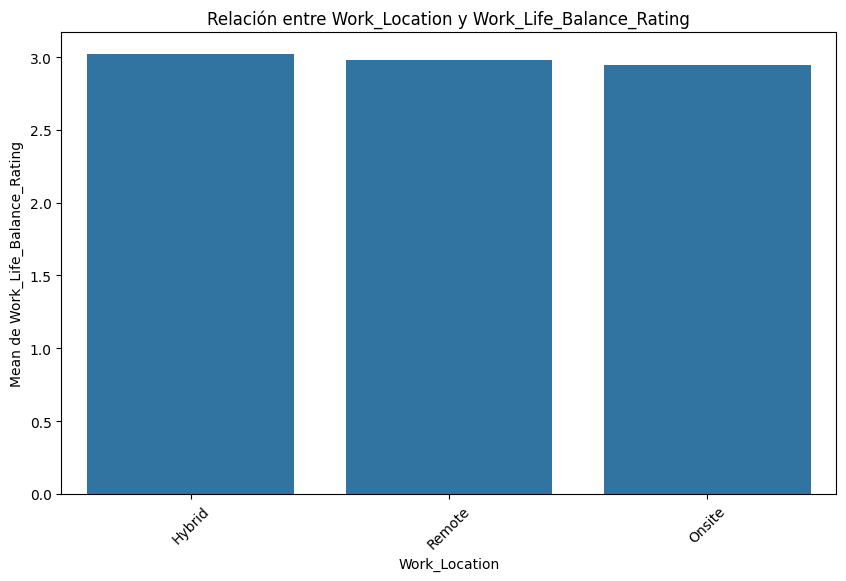

In [7]:
plot_categorical_numerical_relationship(health, "Work_Location", "Work_Life_Balance_Rating")

#Curioso, onsite tiene menor work_life_rating que en hybrid y remote

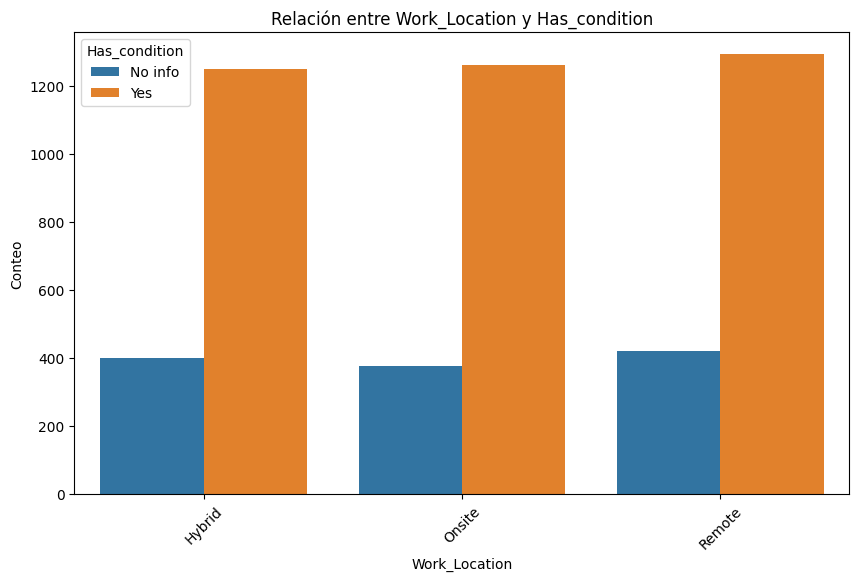

In [8]:
plot_categorical_relationship_fin(health, "Work_Location", "Has_condition")

#un poco más en remote 

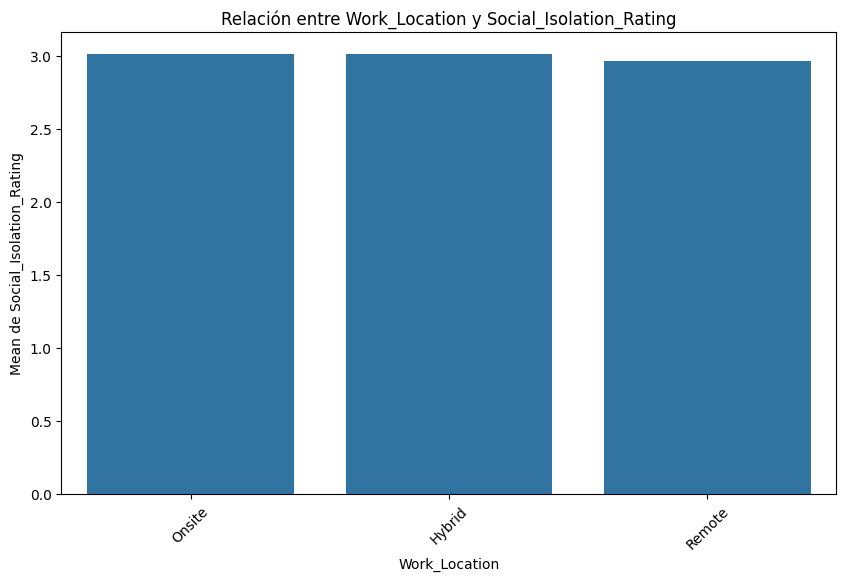

In [9]:
plot_categorical_numerical_relationship(health, "Work_Location", "Social_Isolation_Rating")

#mas en onsite, luego hyburd y luego remote 

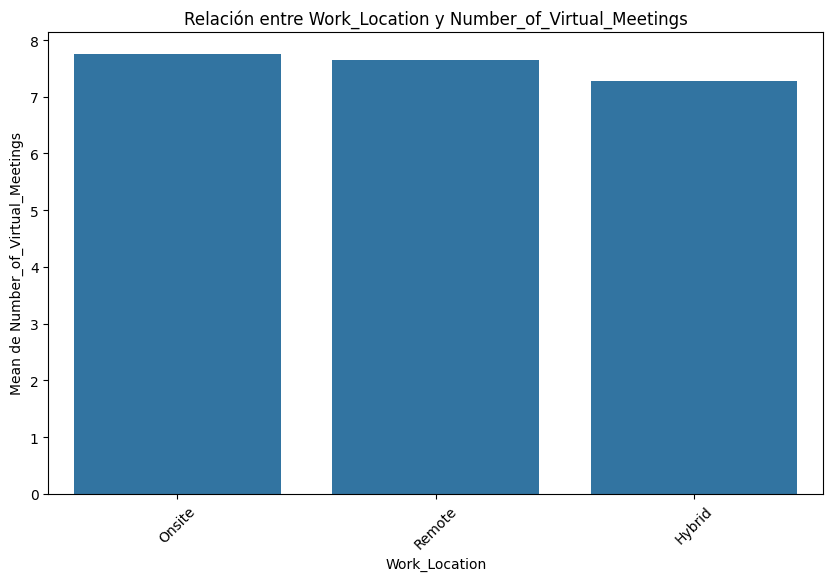

In [10]:
plot_categorical_numerical_relationship(health, "Work_Location", "Number_of_Virtual_Meetings")


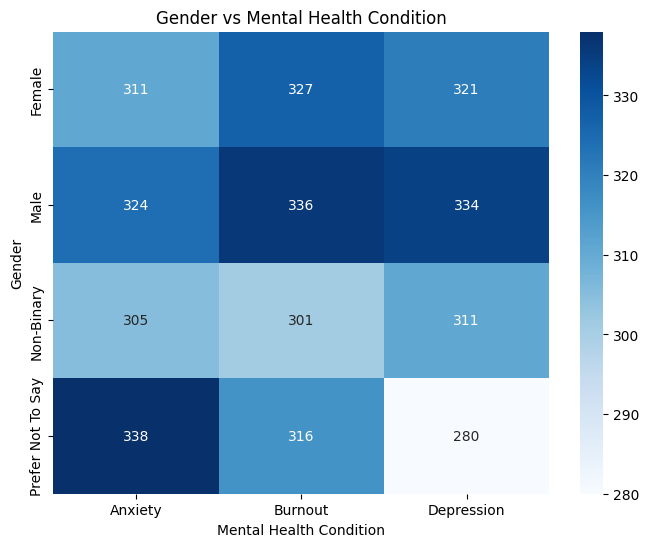

In [134]:
cross_tab = pd.crosstab(health['Gender'], health['Mental_Health_Condition'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True,fmt="d", cmap='Blues')
plt.title('Gender vs Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Gender')
plt.show()

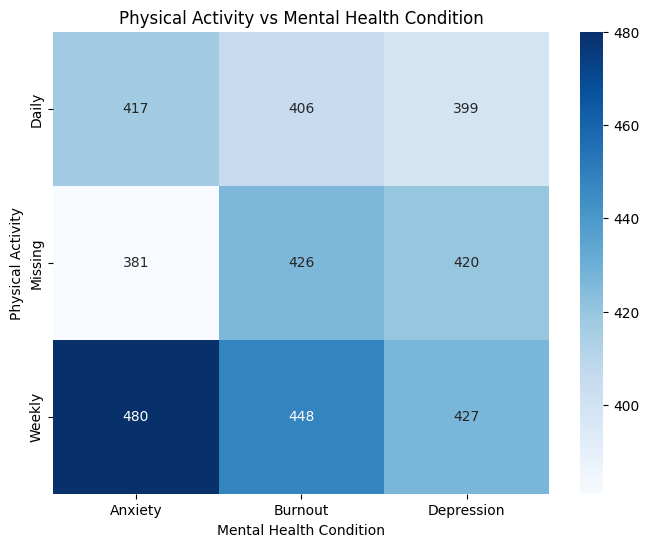

In [135]:
cross_tab = pd.crosstab(health['Physical_Activity'], health['Mental_Health_Condition'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Physical Activity vs Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Physical Activity')
plt.show()

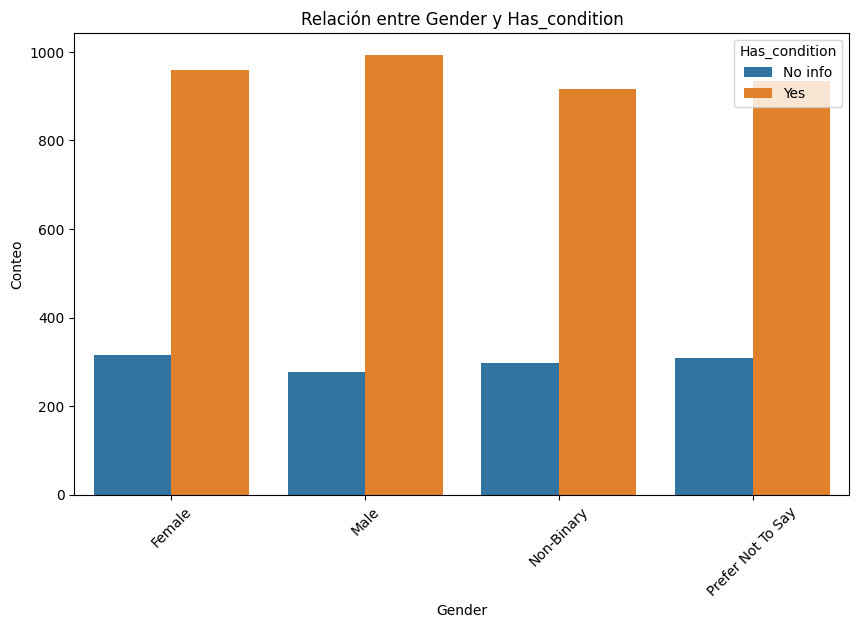

In [13]:
#RELACION ENTRE VARIABLES CATEGORICAS

plot_categorical_relationship_fin(health, "Gender", "Has_condition")

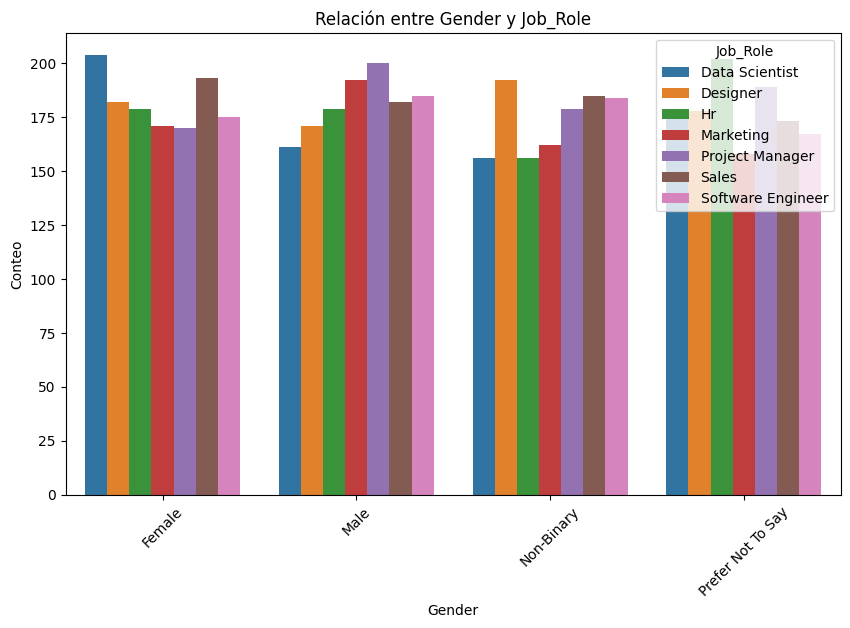

In [14]:
plot_categorical_relationship_fin(health, "Gender", "Job_Role")

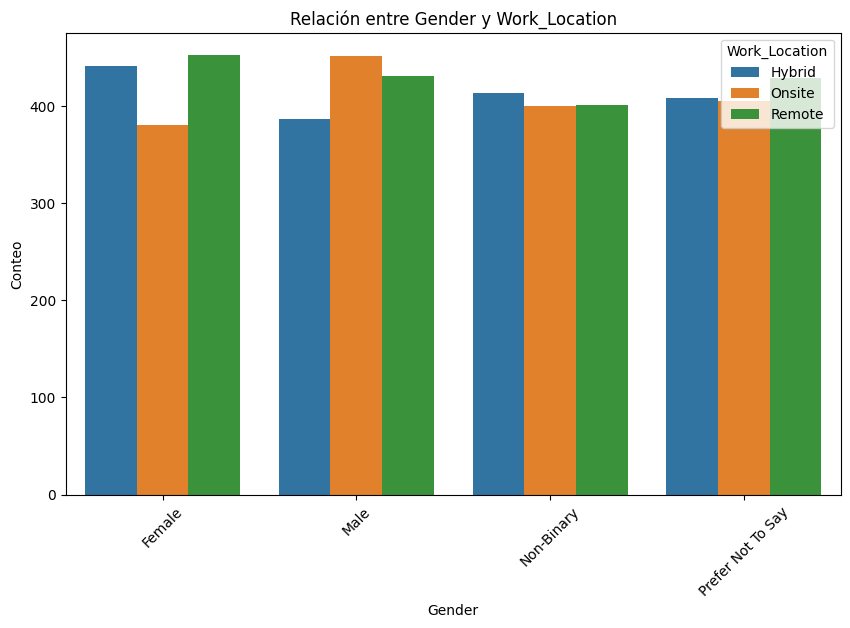

In [15]:
plot_categorical_relationship_fin(health, "Gender", "Work_Location")

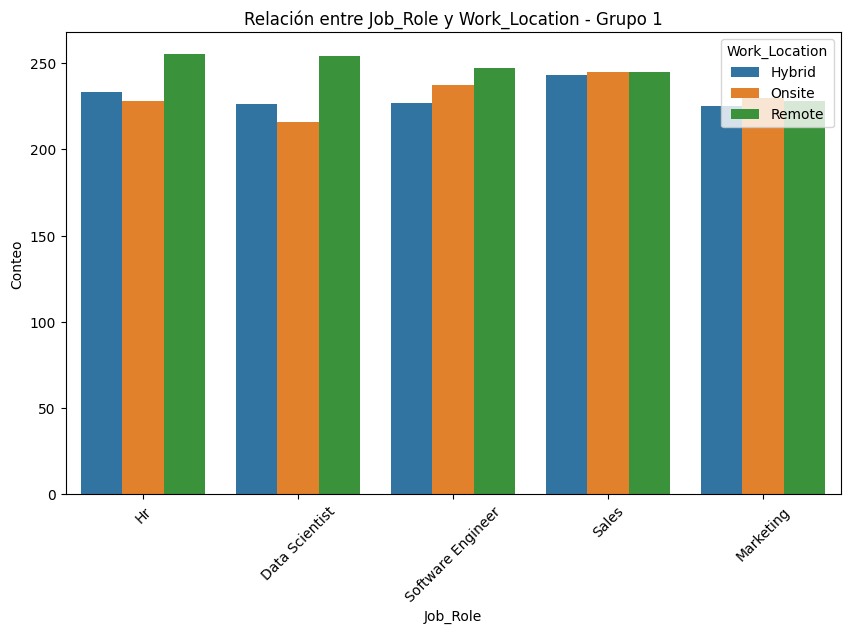

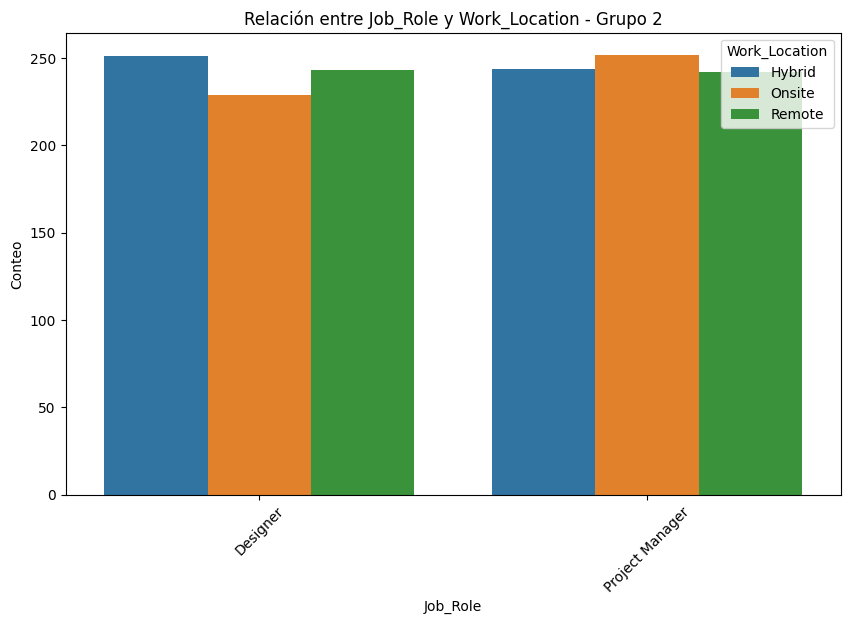

In [16]:
plot_categorical_relationship_fin(health, "Job_Role", "Work_Location")

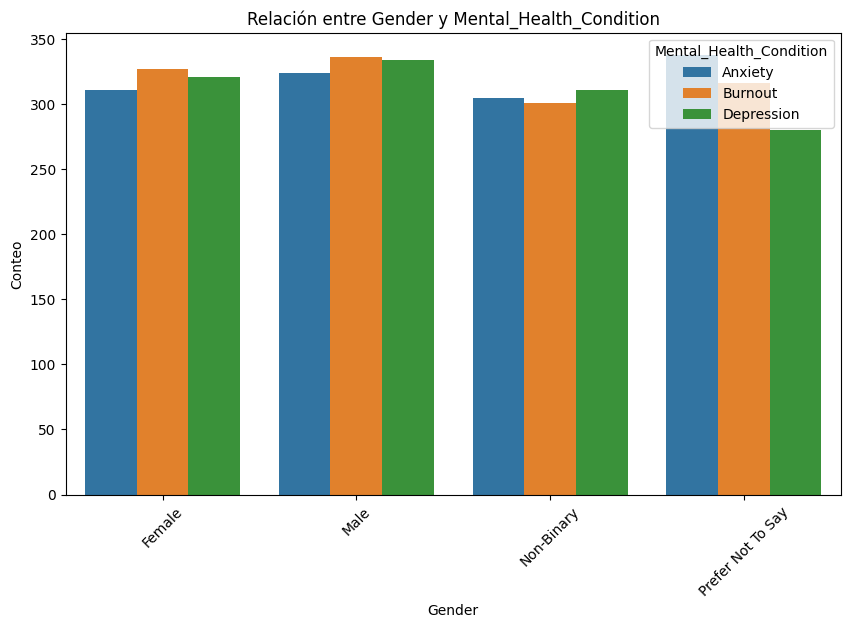

In [17]:
plot_categorical_relationship_fin(health, "Gender", "Mental_Health_Condition")

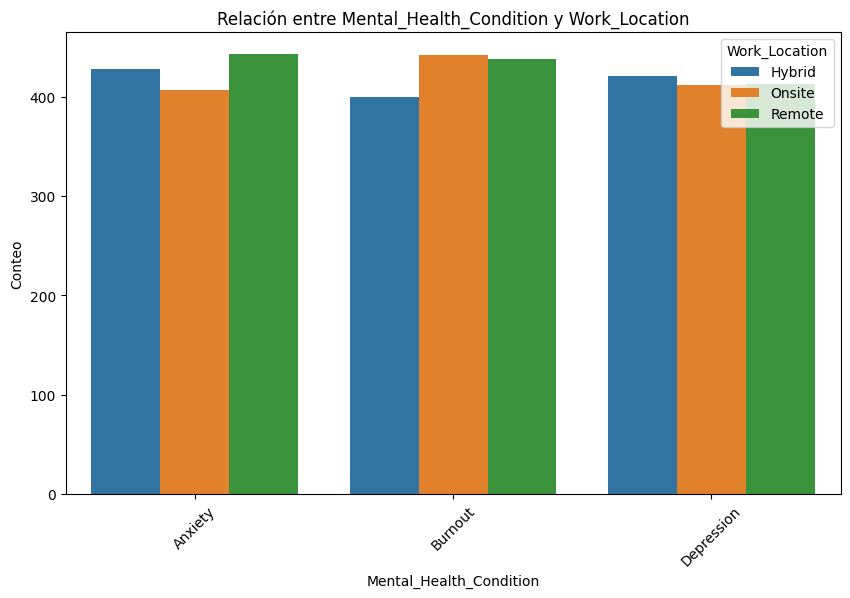

In [18]:
plot_categorical_relationship_fin(health, "Mental_Health_Condition", "Work_Location")

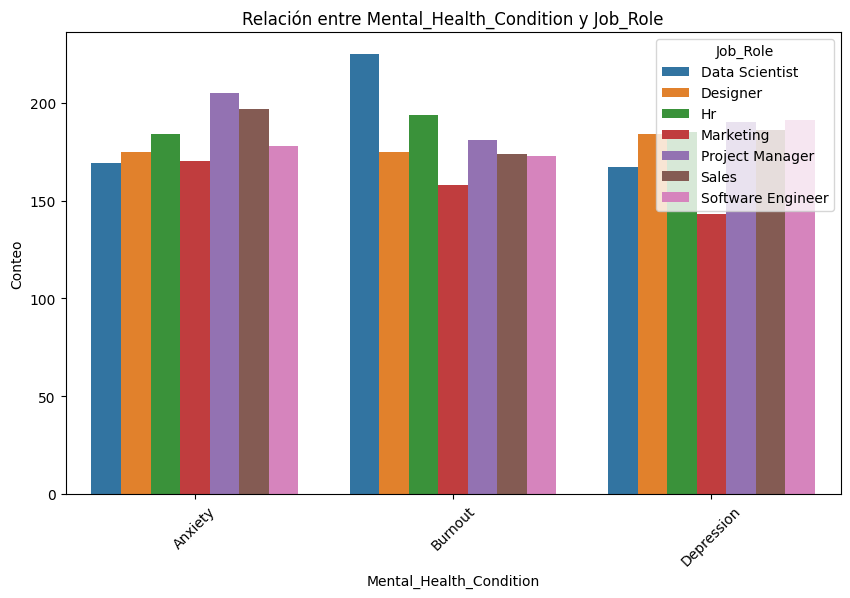

In [19]:
plot_categorical_relationship_fin(health, "Mental_Health_Condition", "Job_Role")

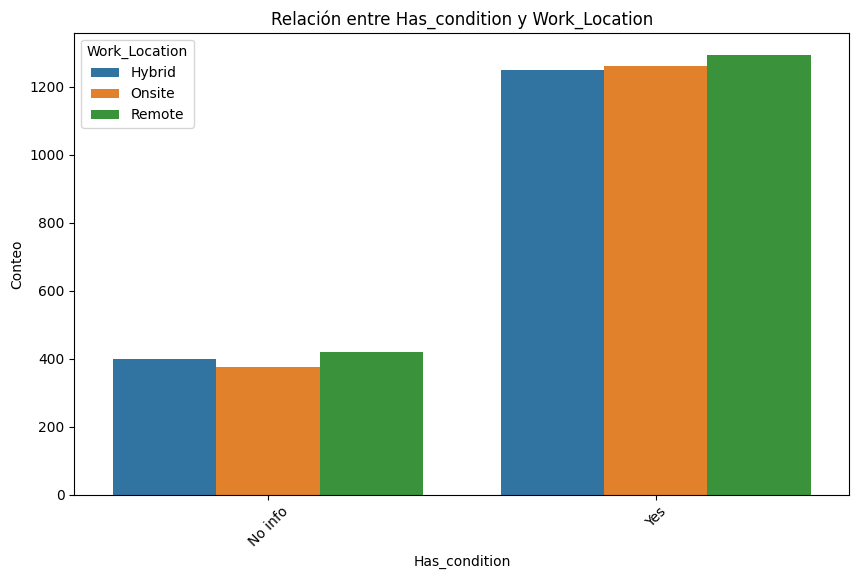

In [20]:
plot_categorical_relationship_fin(health,"Has_condition", "Work_Location")

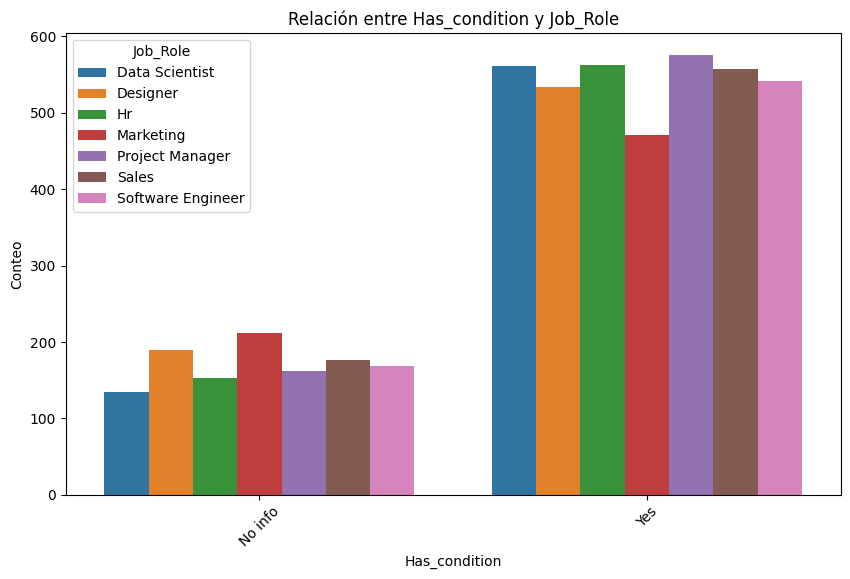

In [21]:
plot_categorical_relationship_fin(health, "Has_condition", "Job_Role")

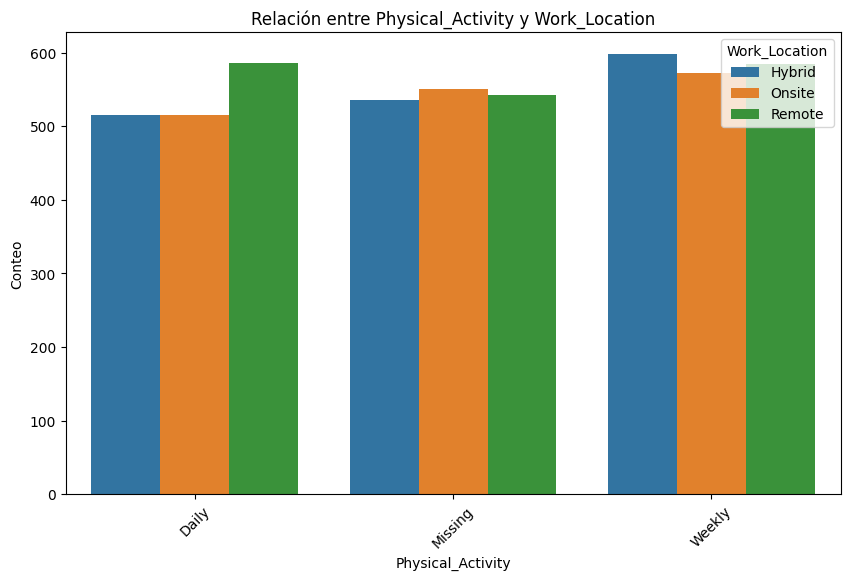

In [22]:
plot_categorical_relationship_fin(health, "Physical_Activity", "Work_Location")

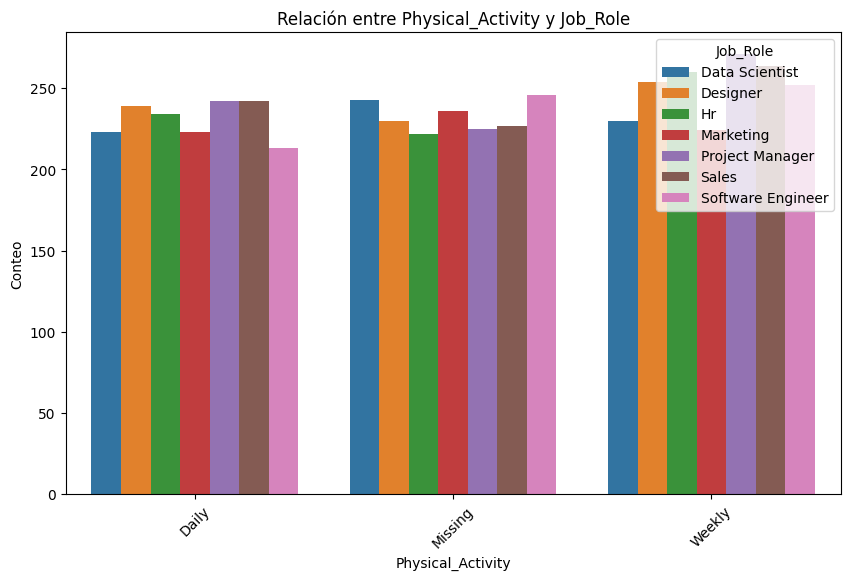

In [23]:
plot_categorical_relationship_fin(health, "Physical_Activity", "Job_Role")

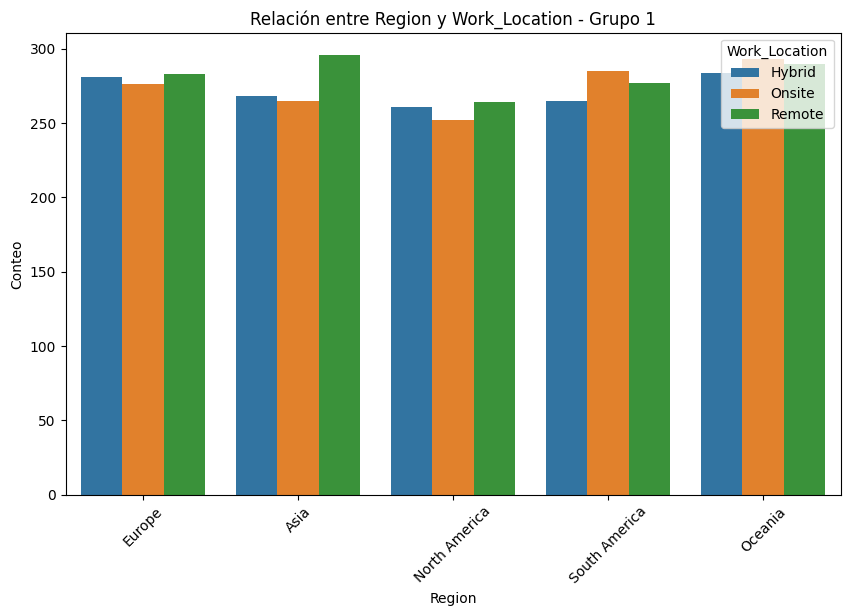

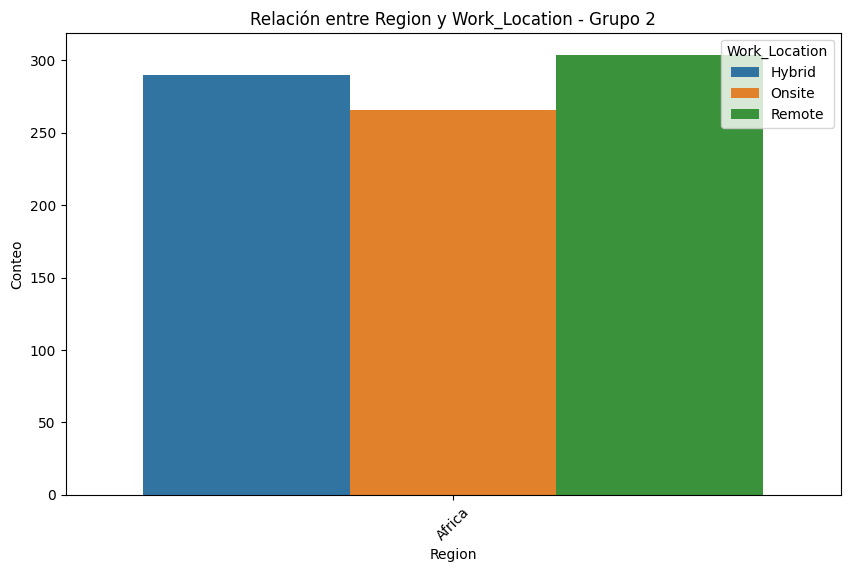

In [24]:
plot_categorical_relationship_fin(health, "Region", "Work_Location")

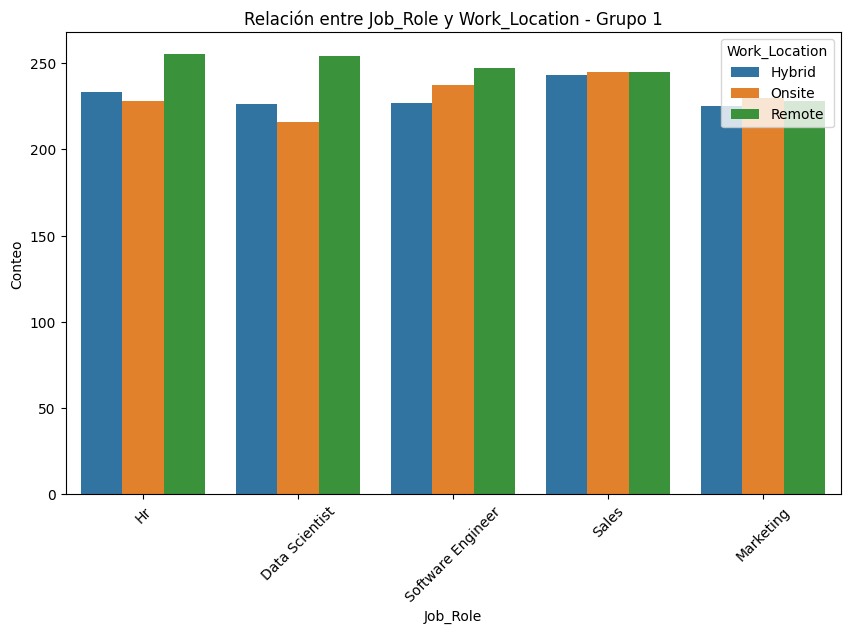

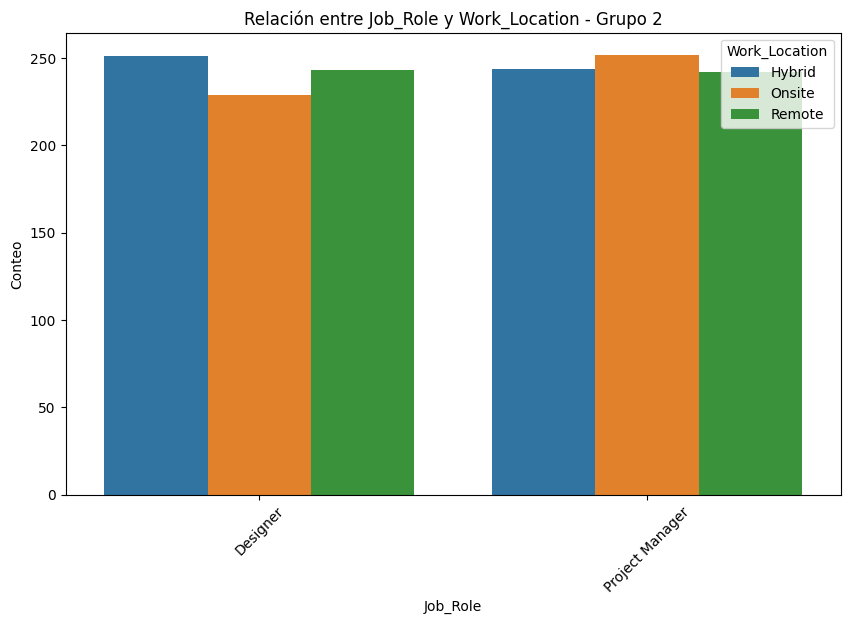

In [25]:
plot_categorical_relationship_fin(health, "Job_Role", "Work_Location")

In [26]:
#Variables numéricas

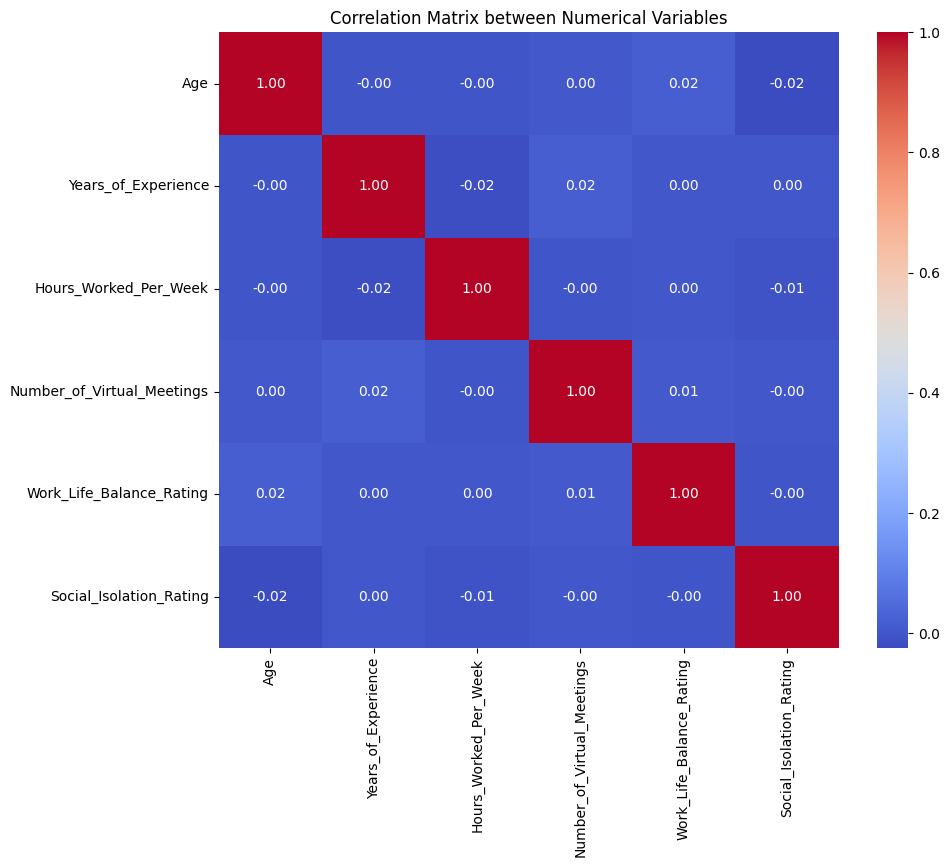

In [136]:
correlation_matrix = health[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 
                             'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 
                             'Social_Isolation_Rating']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Numerical Variables')
plt.show()

In [38]:
#ANALISIS DE WORK LOCATION CON....

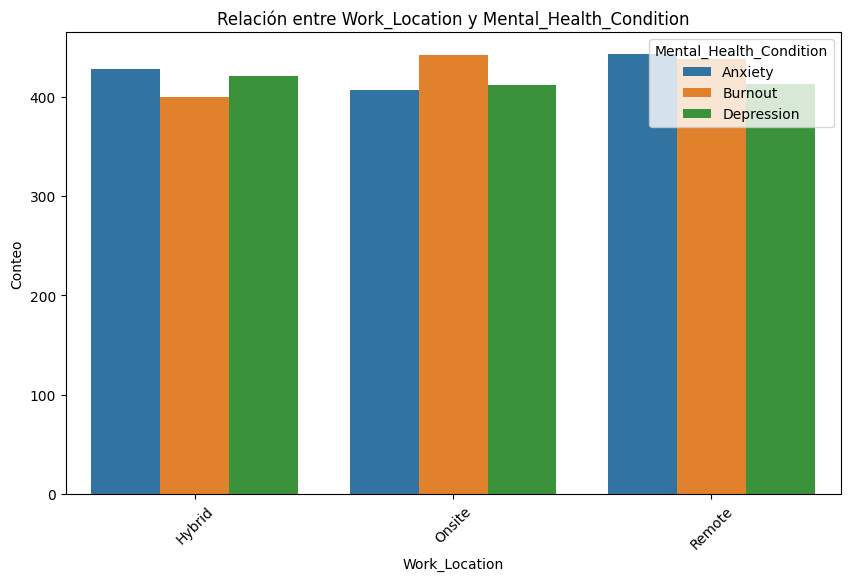

In [39]:
from bootcampviztools import * 

plot_categorical_relationship_fin(health, "Work_Location", "Mental_Health_Condition")

In [137]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health['Mental_Health_Condition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')


Chi2: 3.335476831604484, p-value: 0.50333096779003


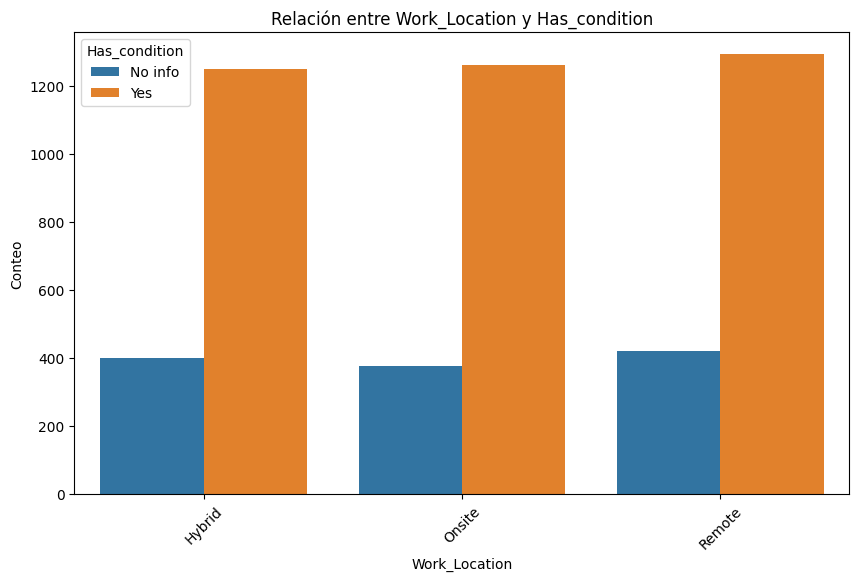

In [42]:
plot_categorical_relationship_fin(health, "Work_Location", "Has_condition")

In [138]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health['Has_condition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')


Chi2: 1.2381014919079731, p-value: 0.5384553259716585


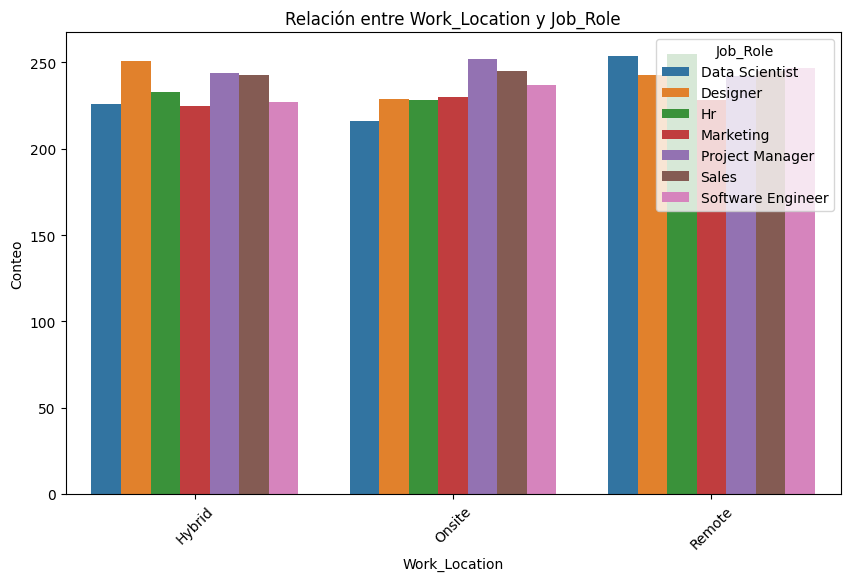

In [45]:
plot_categorical_relationship_fin(health, "Work_Location", "Job_Role")

In [139]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health['Job_Role'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')


Chi2: 5.159734625591554, p-value: 0.9524296472836448


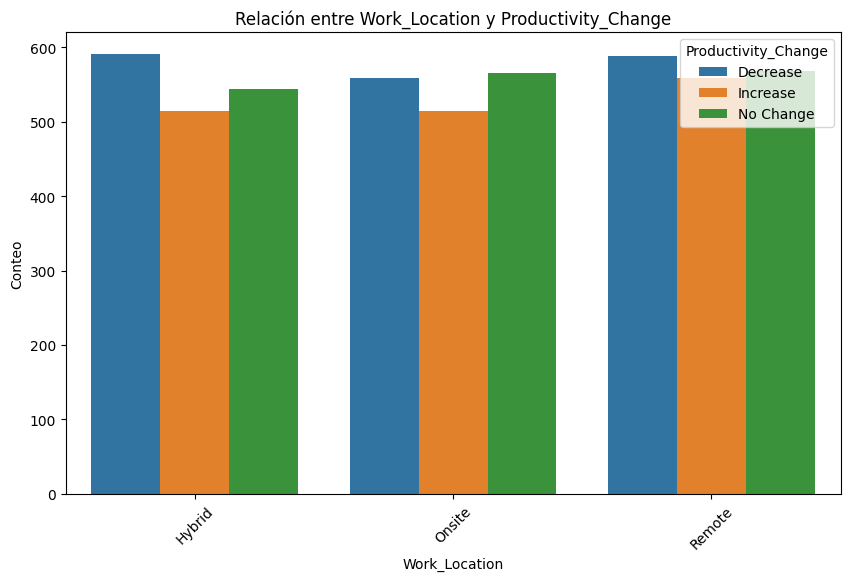

In [48]:
plot_categorical_relationship_fin(health, "Work_Location", "Productivity_Change")

In [140]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(health['Work_Location'], health['Productivity_Change'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 2.150243239109225, p-value: 0.7081482208219014


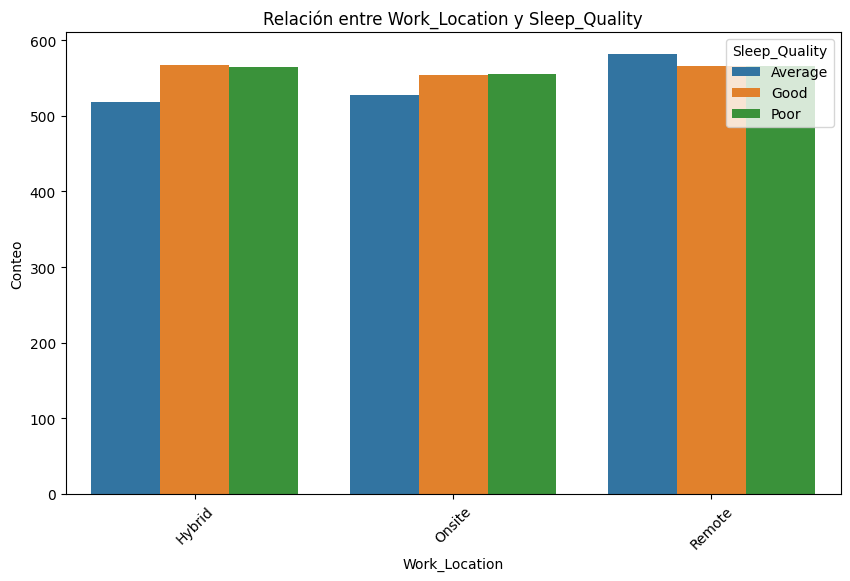

In [51]:
plot_categorical_relationship_fin(health, "Work_Location", "Sleep_Quality")

In [141]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health['Sleep_Quality'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 2.5859538641456092, p-value: 0.6293133413330045


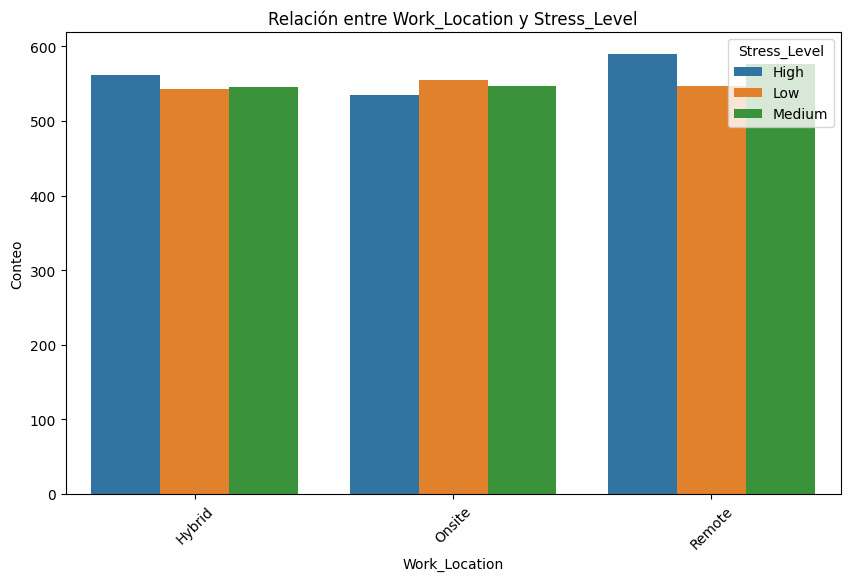

In [54]:
plot_categorical_relationship_fin(health, "Work_Location", "Stress_Level")

In [142]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health['Stress_Level'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 1.92229721637196, p-value: 0.7500478443616597


In [56]:
#no hay relacion 

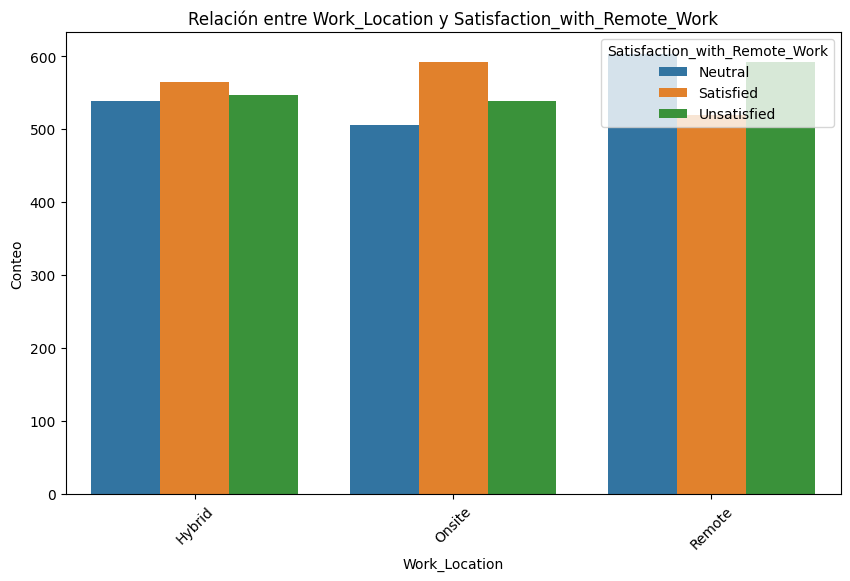

In [57]:
plot_categorical_relationship_fin(health, "Work_Location", "Satisfaction_with_Remote_Work")

In [58]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Work_Location'], health['Satisfaction_with_Remote_Work'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 14.488583346162601, p-value: 0.0058884019693480035


In [59]:
#si hay relacion!!!

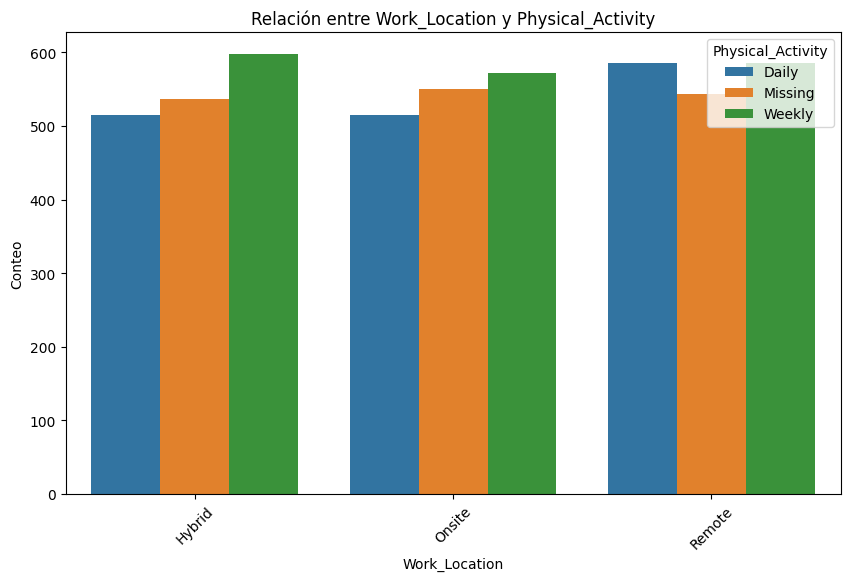

In [61]:
plot_categorical_relationship_fin(health, "Work_Location", "Physical_Activity")

In [143]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(health['Work_Location'], health['Physical_Activity'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 4.889120955462801, p-value: 0.2988647455167681


In [63]:
#no hay relacion

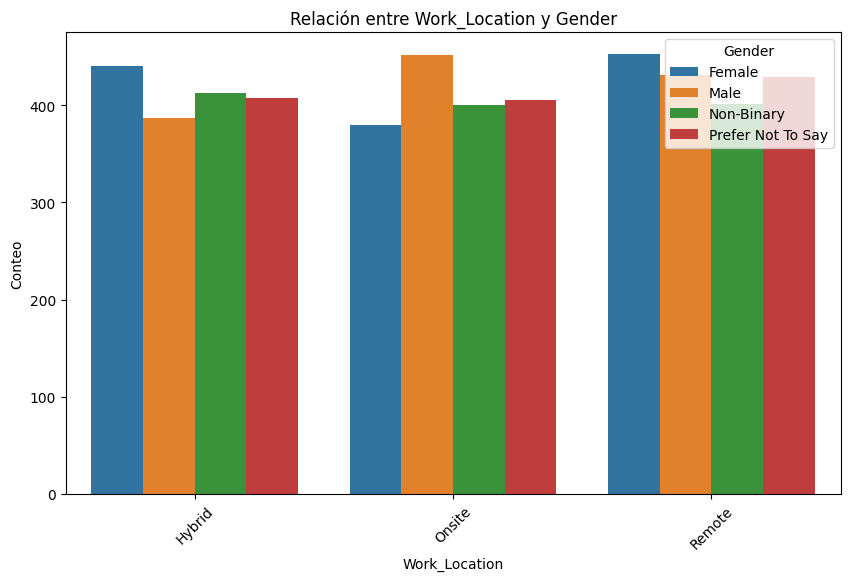

In [64]:
plot_categorical_relationship_fin(health, "Work_Location", "Gender")

In [144]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(health['Work_Location'], health["Gender"])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 11.561535223670964, p-value: 0.07249641576533437


In [66]:
#no hay relacion

In [67]:
#CAT-NUM 

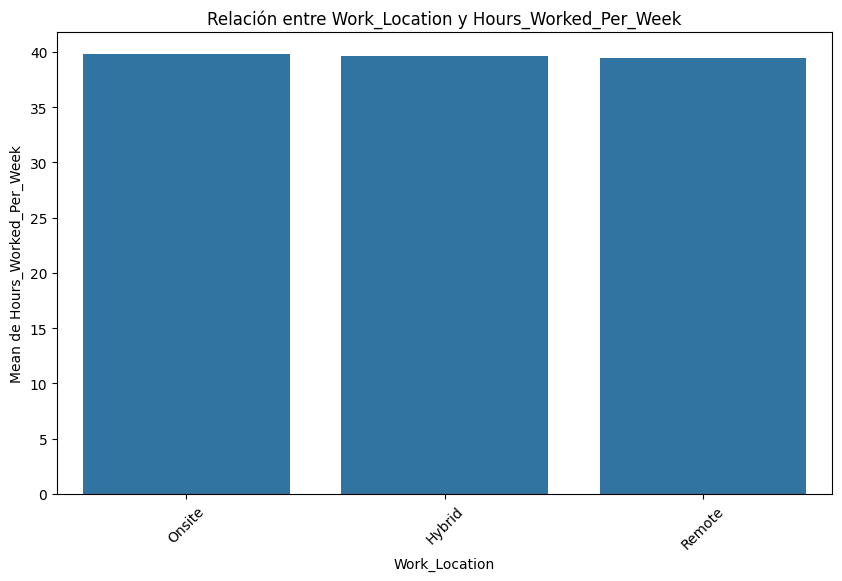

In [68]:
plot_categorical_numerical_relationship(health, "Work_Location", "Hours_Worked_Per_Week")

In [69]:
import scipy.stats as stats
anova_result = stats.f_oneway(
    health[health['Work_Location'] == 'Hybrid']['Hours_Worked_Per_Week'],
    health[health['Work_Location'] == 'Remote']['Hours_Worked_Per_Week'],
    health[health['Work_Location'] == 'Onsite']['Hours_Worked_Per_Week']
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(0.4249350673103193), pvalue=np.float64(0.6538358612127564))


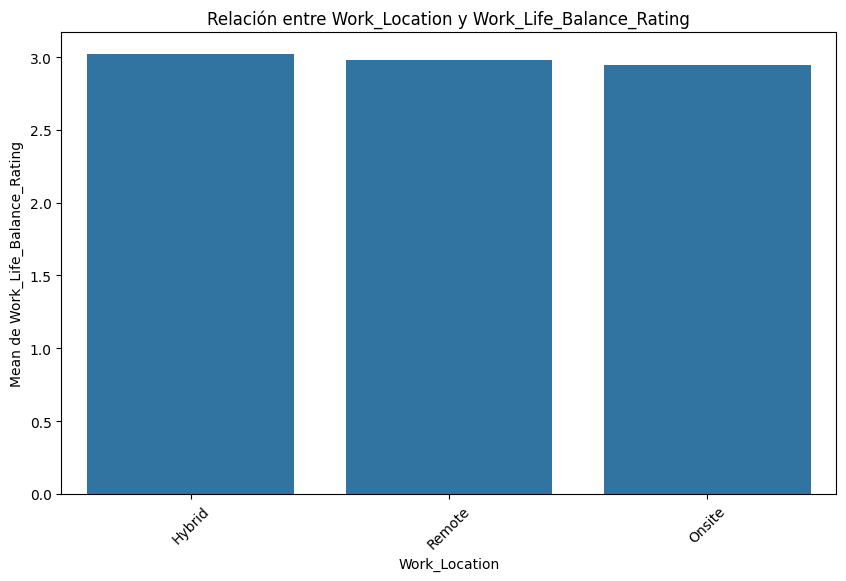

In [71]:
plot_categorical_numerical_relationship(health, "Work_Location", "Work_Life_Balance_Rating")

In [72]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    health[health['Work_Location'] == 'Hybrid']['Work_Life_Balance_Rating'],
    health[health['Work_Location'] == 'Remote']['Work_Life_Balance_Rating'],
    health[health['Work_Location'] == 'Onsite']['Work_Life_Balance_Rating']
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(1.180344817827088), pvalue=np.float64(0.3072584295175477))


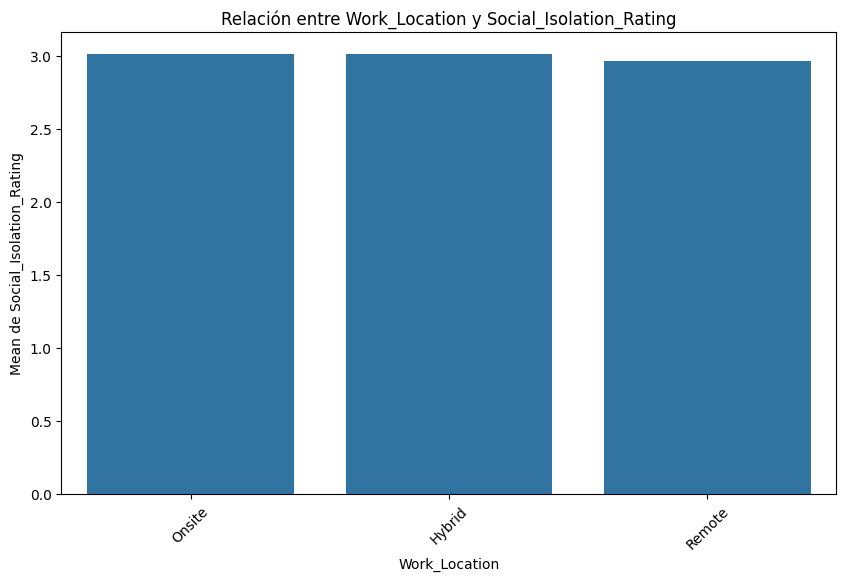

In [74]:
plot_categorical_numerical_relationship(health, "Work_Location", "Social_Isolation_Rating")

In [75]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    health[health['Work_Location'] == 'Hybrid']['Social_Isolation_Rating'],
    health[health['Work_Location'] == 'Remote']['Social_Isolation_Rating'],
    health[health['Work_Location'] == 'Onsite']['Social_Isolation_Rating']
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(0.7036564919853698), pvalue=np.float64(0.494821877482158))


In [76]:
#No hay relacion

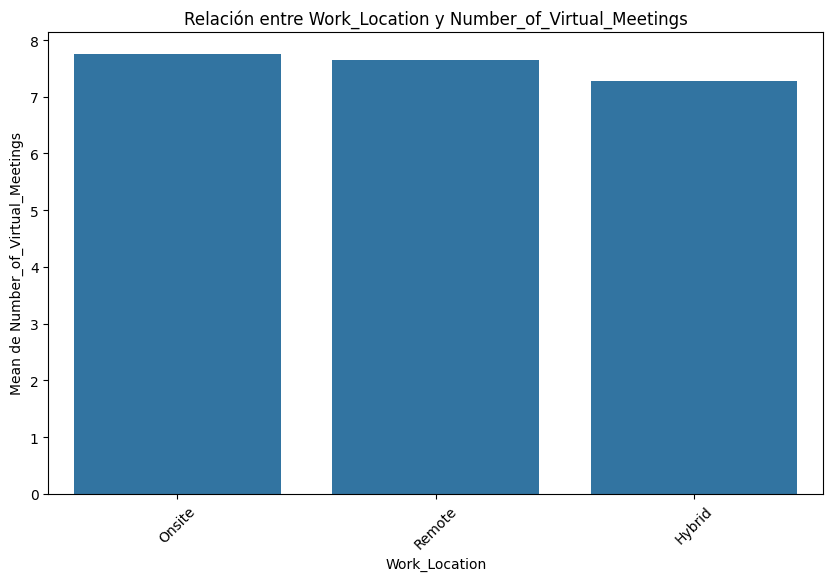

In [77]:
plot_categorical_numerical_relationship(health, "Work_Location", "Number_of_Virtual_Meetings")

In [78]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    health[health['Work_Location'] == 'Hybrid']["Number_of_Virtual_Meetings"],
    health[health['Work_Location'] == 'Remote']["Number_of_Virtual_Meetings"],
    health[health['Work_Location'] == 'Onsite']["Number_of_Virtual_Meetings"]
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(4.844057514229829), pvalue=np.float64(0.007912054639926933))


In [81]:
#Esto indica que, aunque los tres tipos de Work Location tienen un número similar de reuniones virtuales (en torno a las 7 por semana),
#  Onsite tiene ligeramente más reuniones que Remote y Hybrid.

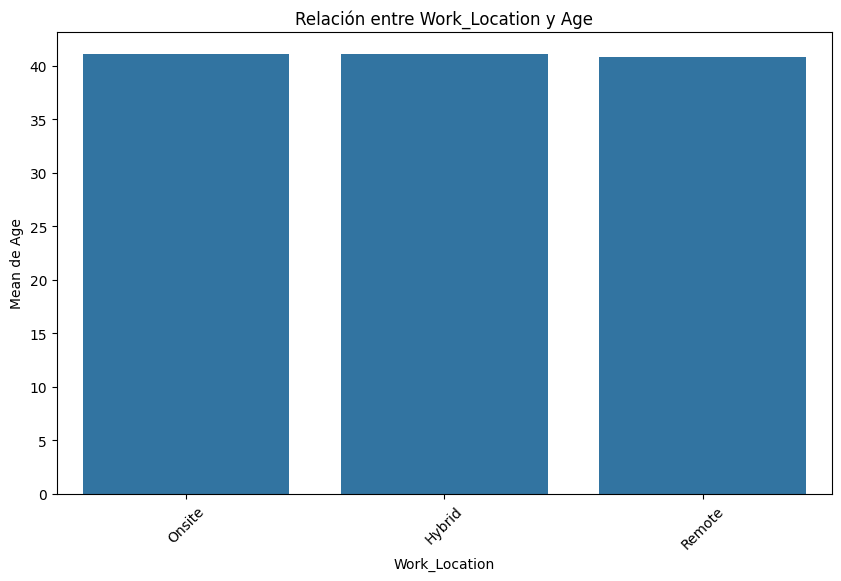

In [82]:
plot_categorical_numerical_relationship(health, "Work_Location", "Age")

In [83]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    health[health['Work_Location'] == 'Hybrid']["Age"],
    health[health['Work_Location'] == 'Remote']["Age"],
    health[health['Work_Location'] == 'Onsite']["Age"]
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(0.23017956329602404), pvalue=np.float64(0.7943993686045103))


In [84]:
#No hay relacion

In [85]:
#CAT-CAT Stress_Level

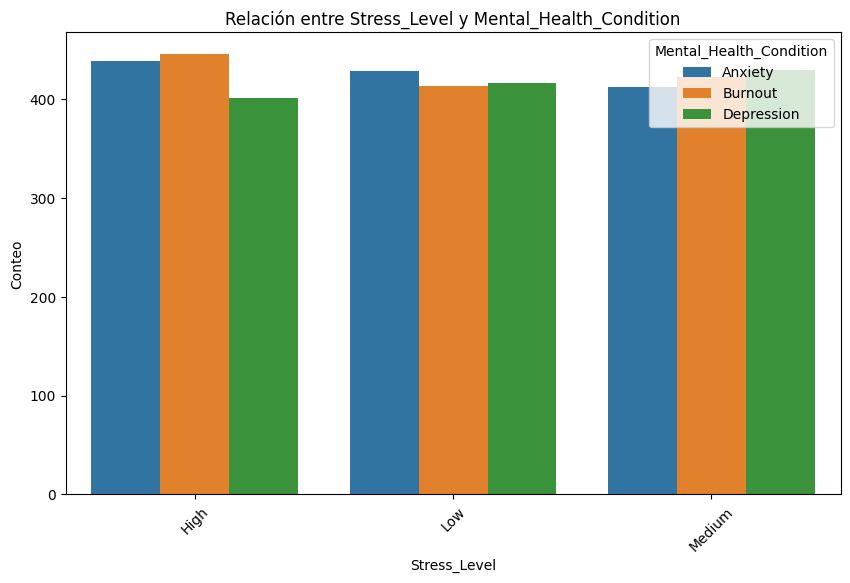

In [86]:
plot_categorical_relationship_fin(health, "Stress_Level", "Mental_Health_Condition")

In [87]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Stress_Level'], health["Mental_Health_Condition"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 2.7016013739299813, p-value: 0.6089344217154246


In [88]:
#No hay relacion 

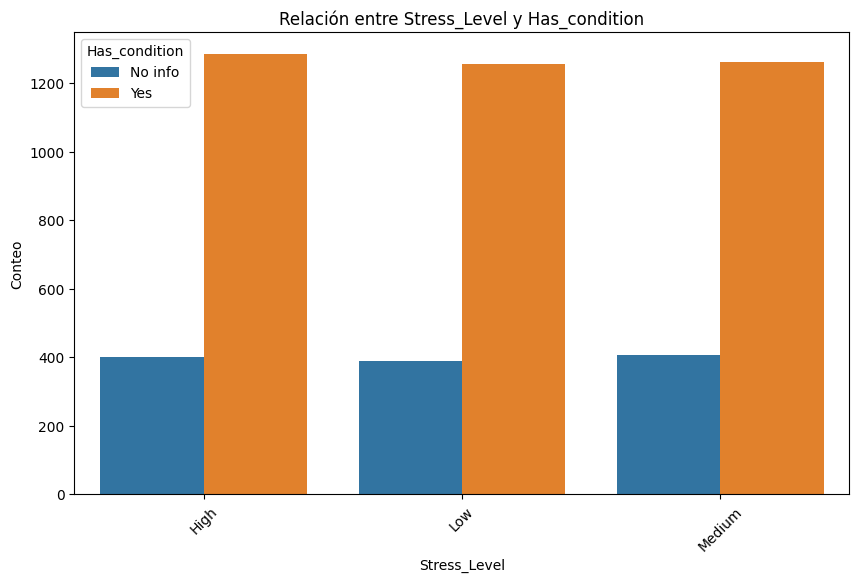

In [89]:
plot_categorical_relationship_fin(health, "Stress_Level", "Has_condition")

In [90]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Stress_Level'], health["Has_condition"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 0.2570266119440879, p-value: 0.8794018610439885


In [91]:
#no hay relación 

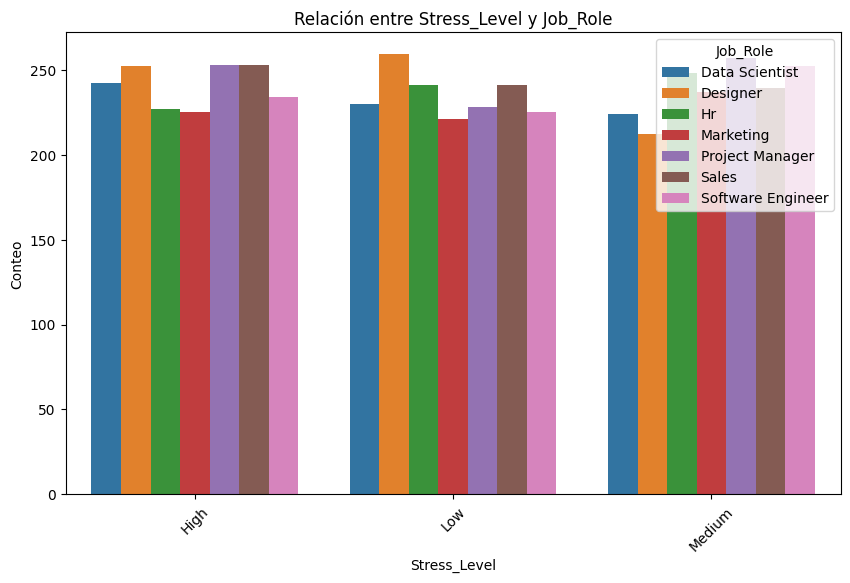

In [92]:
plot_categorical_relationship_fin(health, "Stress_Level", "Job_Role")

In [93]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Stress_Level'], health["Job_Role"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 11.203878889845441, p-value: 0.5115318276197425


In [94]:
#no hay relacion 

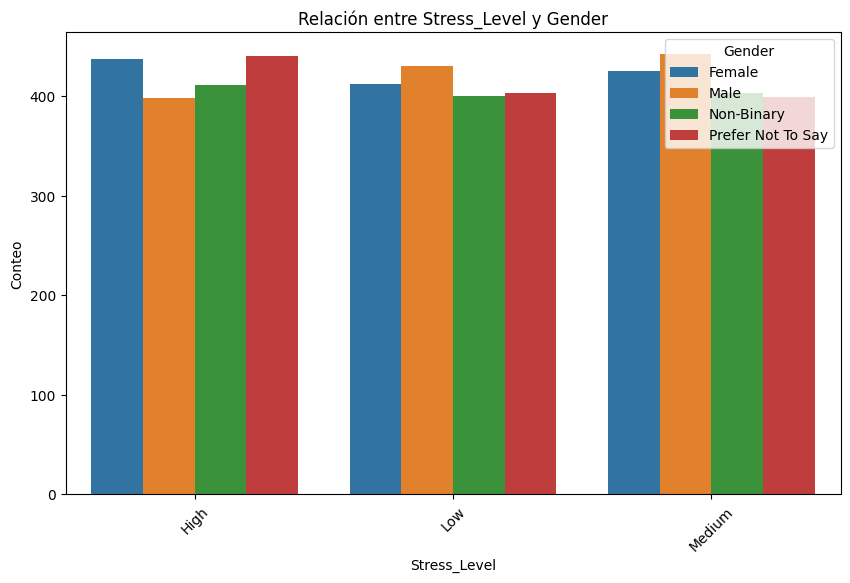

In [95]:
plot_categorical_relationship_fin(health, "Stress_Level", "Gender")

In [96]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(health['Stress_Level'], health["Gender"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 5.266070950925396, p-value: 0.5101681684403645


In [97]:
#no hay relacion

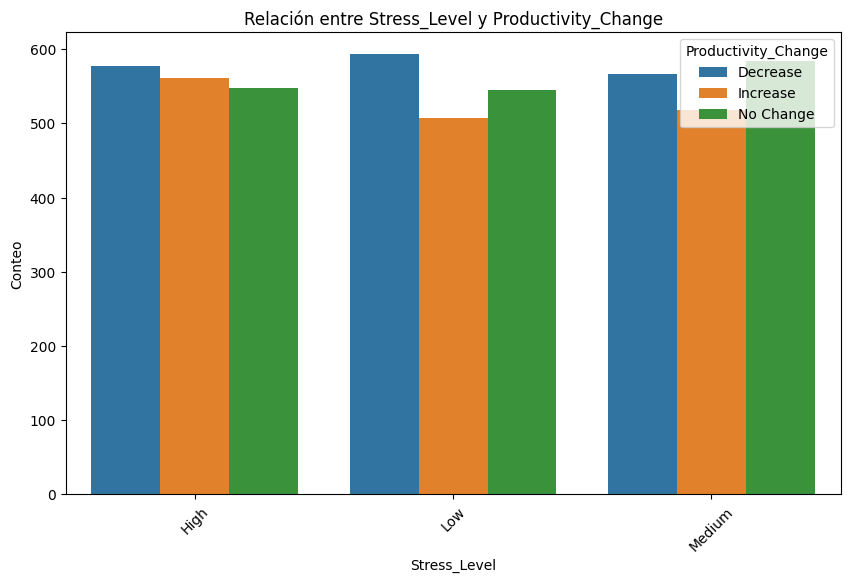

In [98]:
plot_categorical_relationship_fin(health, "Stress_Level", "Productivity_Change")

In [99]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(health['Stress_Level'], health["Productivity_Change"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 4.842975847646148, p-value: 0.30379188466974266


In [100]:
#no hay relacion

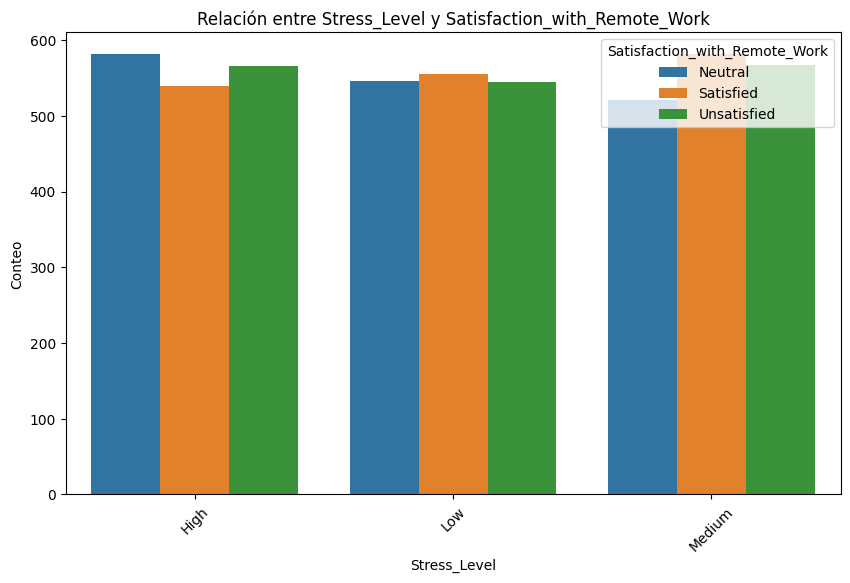

In [101]:
plot_categorical_relationship_fin(health, "Stress_Level", "Satisfaction_with_Remote_Work")

In [102]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(health['Stress_Level'], health["Satisfaction_with_Remote_Work"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 4.983634870510266, p-value: 0.2889807854248463


In [103]:
#no hay relacion

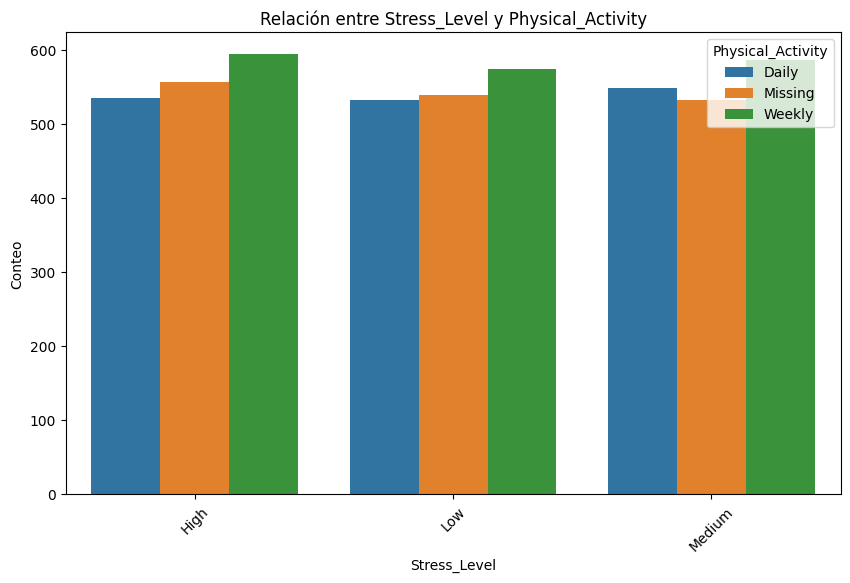

In [104]:
plot_categorical_relationship_fin(health, "Stress_Level", "Physical_Activity")

In [105]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Stress_Level'], health["Physical_Activity"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 0.7197237455805648, p-value: 0.9488744917068764


In [106]:
#No hay relacion

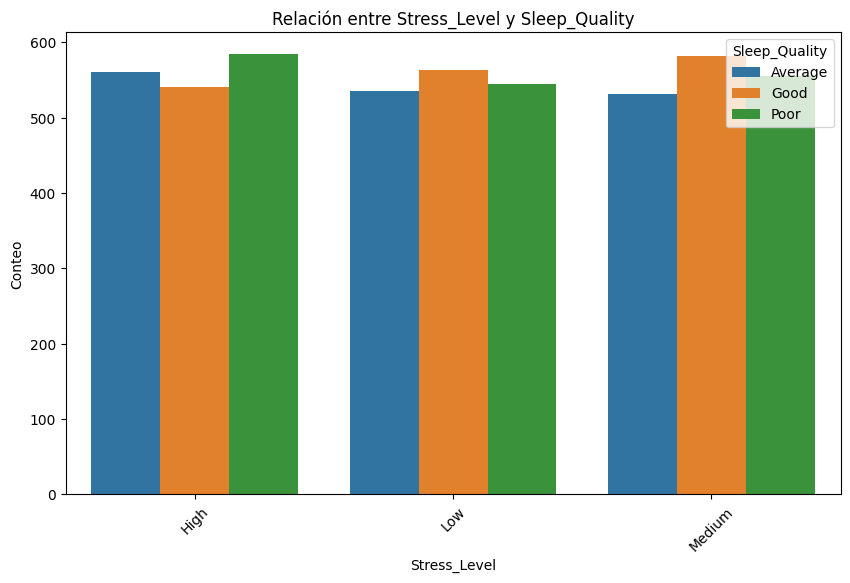

In [107]:
plot_categorical_relationship_fin(health, "Stress_Level", "Sleep_Quality")

In [108]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['Stress_Level'], health["Sleep_Quality"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 3.3632917908743414, p-value: 0.498967084000715


In [109]:
#no hay relacion

In [110]:
#Cat-num STRESS LEVEL

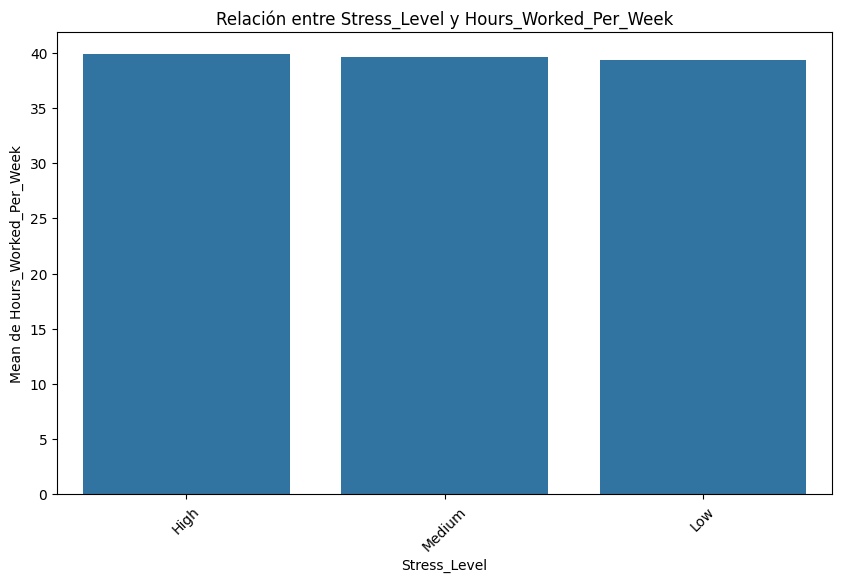

In [111]:
plot_categorical_numerical_relationship(health, "Stress_Level", "Hours_Worked_Per_Week")

In [112]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    health[health['Stress_Level'] == 'High']["Hours_Worked_Per_Week"],
    health[health['Stress_Level'] == 'Low']["Hours_Worked_Per_Week"],
    health[health['Stress_Level'] == 'Medium']["Hours_Worked_Per_Week"]
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(0.6848868641085849), pvalue=np.float64(0.5041945815395701))


In [113]:
#En otras palabras, según los datos, Stress Level no parece depender de la cantidad de horas trabajadas por semana.

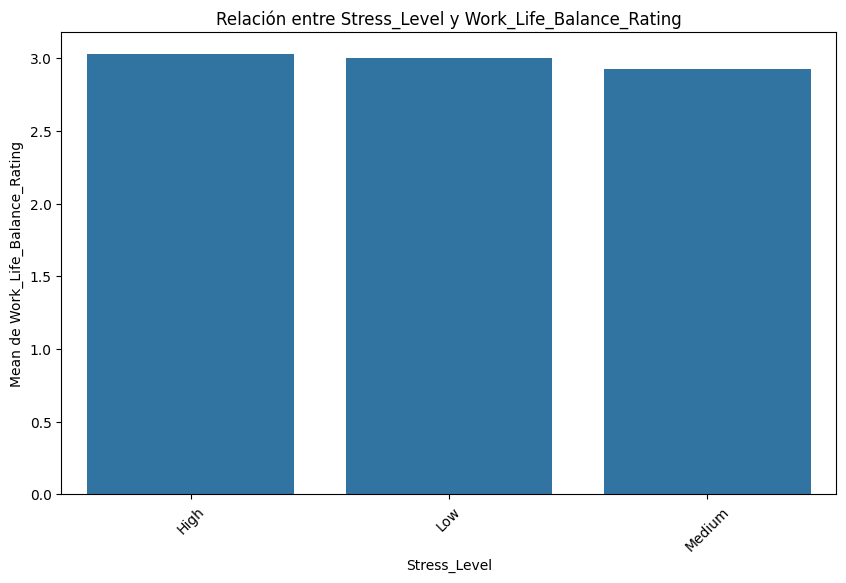

In [114]:
plot_categorical_numerical_relationship(health, "Stress_Level", "Work_Life_Balance_Rating")

In [115]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    health[health['Stress_Level'] == 'High']["Work_Life_Balance_Rating"],
    health[health['Stress_Level'] == 'Low']["Work_Life_Balance_Rating"],
    health[health['Stress_Level'] == 'Medium']["Work_Life_Balance_Rating"]
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(2.419562845902653), pvalue=np.float64(0.08906471471009964))


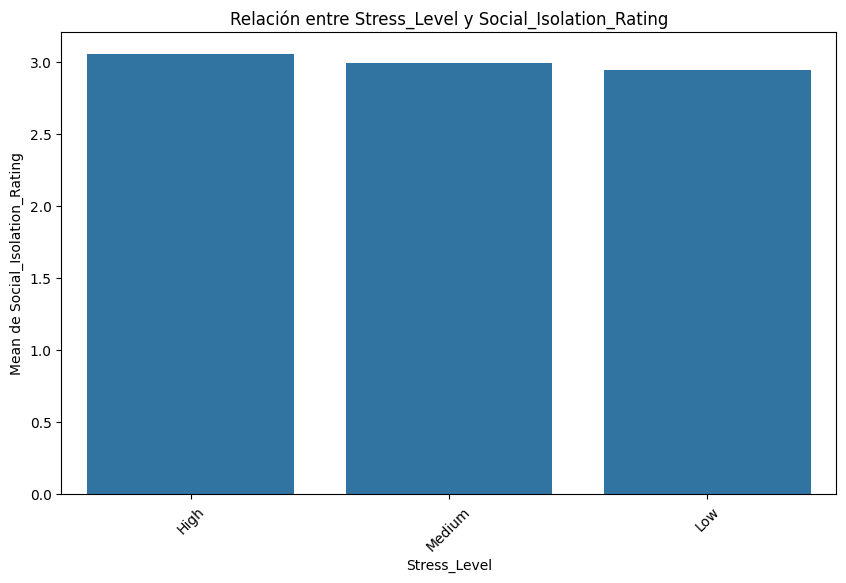

In [117]:
plot_categorical_numerical_relationship(health, "Stress_Level", "Social_Isolation_Rating")

In [118]:
import scipy.stats as stats


anova_result = stats.f_oneway(
    health[health['Stress_Level'] == 'High']["Social_Isolation_Rating"],
    health[health['Stress_Level'] == 'Low']["Social_Isolation_Rating"],
    health[health['Stress_Level'] == 'Medium']["Social_Isolation_Rating"]
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(2.4999793513140838), pvalue=np.float64(0.08218935757344178))


In [119]:
#no hay relacion pero por muy pcoo 

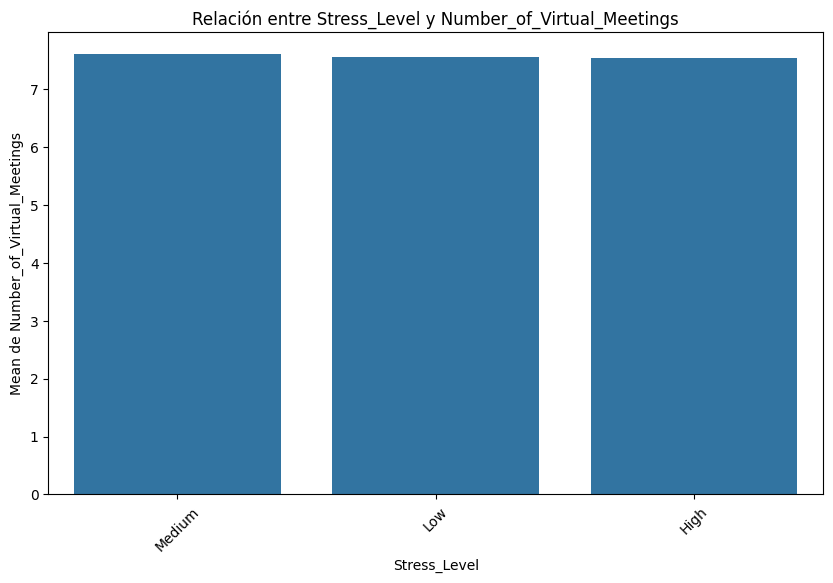

In [120]:
plot_categorical_numerical_relationship(health, "Stress_Level", "Number_of_Virtual_Meetings")

In [121]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    health[health['Stress_Level'] == 'High']["Number_of_Virtual_Meetings"],
    health[health['Stress_Level'] == 'Low']["Number_of_Virtual_Meetings"],
    health[health['Stress_Level'] == 'Medium']["Number_of_Virtual_Meetings"]
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(0.08985696273350308), pvalue=np.float64(0.9140633977688344))


In [122]:
#No hay relacion

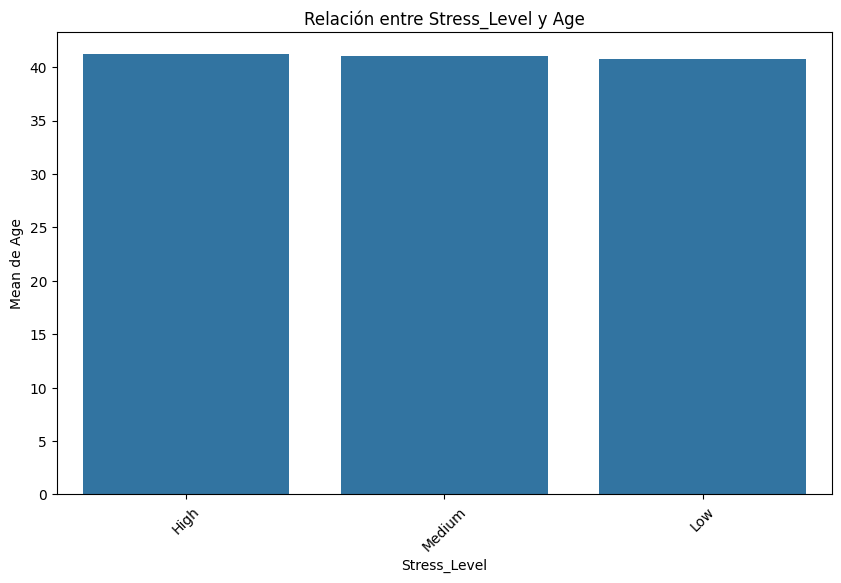

In [123]:
plot_categorical_numerical_relationship(health, "Stress_Level", "Age")

In [124]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    health[health['Stress_Level'] == 'High']["Age"],
    health[health['Stress_Level'] == 'Low']["Age"],
    health[health['Stress_Level'] == 'Medium']["Age"]
)

print("Resultado de ANOVA:", anova_result)

Resultado de ANOVA: F_onewayResult(statistic=np.float64(0.5747684337181113), pvalue=np.float64(0.5628723927249977))


In [125]:
#No hay relación